In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 환경에서 사용 가능한 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [3]:
# 파일 경로 설정
file_path = "C:\\Users\\SKTelecom\\Desktop\\LLM0326.csv"

In [4]:
# 사전 정의 카테고리
categories = {
    '정치': ['정치', '국내 정치', '국제 정치', '선거', '정책', '외교', '의회', '정부', '법안',
            '정권', '정당', '대선', '총선', '정치인', '국회의원', '청와대', '민주주의', '정치 사안', 
            '정치 뉴스', '외교 정책', '입법', '정치 갈등', '탄핵', '정치 토론'],
    '경제': ['경제', '금융', '주식', '무역', '기업', '투자', '비트코인', '이더리움', '배당주', '경제 정책',
            '물가', '환율', '인플레이션', '디플레이션', '증시', '코스피', '코스닥', '펀드', '채권', 
            '금리', '스타트업', '재정정책', '소비자 지출', '가계경제', '블록체인'],
    '사회': ['사회', '교육', '복지', '법률', '인권', '사회 문제', '환경', '봉사활동', '노인 복지',
            '청소년 문제', '실업', '성평등', '장애인 인권', '학교폭력', '기후 변화', '미세먼지', 
            '재난', '빈곤', '소외 계층', '지역사회', '사회 제도', '인권 침해', '아동 복지'],
    '문화/예술': ['문화', '예술', '영화', '음악', '미술', '문학', '공연', '전시회',
                '드라마', '클래식', '대중문화', 'K-pop', '콘서트', '뮤지컬', '작가', 
                '예술가', '문화유산', '박물관', '문화 행사', '출판', '문화 콘텐츠', '애니메이션'],
    '과학/기술': ['과학', '기술', 'IT', 'AI', '우주 탐사', '환경 과학', '암호화 기술', '로봇공학',
                '빅데이터', '머신러닝', '양자컴퓨팅', '가상현실', '드론', '자율주행', '5G', 
                '생명공학', '나노기술', '신재생에너지', '사이버보안', '첨단 기술', '기술 혁신'],
    '스포츠': ['스포츠', '축구', '야구', '농구', '올림픽', '운동 경기',
             '테니스', '골프', '배구', 'e스포츠', '스포츠 뉴스', '월드컵', 
             '아시안게임', '체육대회', '스포츠 스타', '경기 분석', '운동선수', '스포츠 팀'],
    '취미/여가': ['취미', '여가 활동', '게임', '여행', '요리', 'DIY 활동',
               '사진', '등산', '낚시', '캠핑', '독서', '영화 감상', '퍼즐', '보드게임', 
               '플라워아트', '드로잉', '베이킹', '홈카페', '원예', '코스요리'],
    '건강/의학': ['건강', '의학', '질병 정보', '운동법', '건강 관리 팁',
                '영양', '식이요법', '정신건강', '예방접종', '병원 진료', '약 정보', 
                '건강 식품', '스트레스 관리', '명상', '수면 습관', '감기', '만성질환', '헬스'],
    '생활 정보': ['생활 정보', '쇼핑 팁', '패션 트렌드', '주거 정보',
               '생활 꿀팁', '인테리어', '청소 방법', '주방용품', '할인 정보', 
               '계절별 패션', '부동산', '월세', '이사', '홈쇼핑', '스마트소비', '알뜰 쇼핑'],
    '뉴스/시사': ['뉴스', '시사 이슈',
               '속보', '브리핑', '긴급 뉴스', '정치 이슈', '경제 뉴스', '사회 이슈', 
               '사건 사고', '핫이슈', '국제 뉴스', '언론보도', '오늘의 뉴스', '일간지'], 
    '교육/학습': ['교육', '시험', '공부', '자기주도', '교과', '입시', '강의',
               '습관', '에듀테크', '학원', '독학', '자격증'],

    '종교/철학': ['종교', '철학', '기독교', '불교', '이슬람', '윤리', '신앙',
               '명상', '형이상학', '실존주의', '의미', '철학자', '인문학'],

    '역사': ['역사', '고대', '현대사', '세계사', '한국사', '전쟁', '인물',
           '중세', '근현대', '유산', '사실', '고고학', '연표', '연구'],

    '환경': ['기후', '재활용', '에너지', '온난화', '탄소', '친환경',
           '플라스틱', '생태계', '보호', '운동', '녹색에너지', '지속성', '대기오염'],
    '여행/관광': ['여행', '관광', '숙박', '일정', '해외', '국내', '맛집', '교통편',
               '후기', '추천', '호텔', '문화', '자연경관'],

    '음식/요리': ['요리', '식단', '맛집', '한식', '양식', '중식', '일식', '베이킹',
               '건강식', '간편식', '레시피', '쿠킹', '채식'],

    '패션/뷰티': ['패션', '메이크업', '피부', '계절별', '뷰티', '헤어스타일', '네일아트',
               '화장품', '코디', '셀프', '아이템', '루틴'],

    '가정/육아': ['육아', '가정', '자녀', '아기', '부모', '가사노동', '성장',
               '용품', '역할', '생활습관', '훈육', '문제'],
    '펫/반려동물': ['반려동물', '강아지', '고양이', '펫푸드', '동물병원', '건강', 
                 '입양', '산책', '용품', '사회화', '장난감', '보험'],

    '인테리어': ['인테리어', 'DIY', '트렌드', '홈스타일링', '미니멀', '셀프', 
               '공간', '조명', '벽지', '소품', '홈카페'],

    '자기계발': ['시간', '목표', '생산성', '자기관리', '루틴', '우선순위', 
               '통제력', '집중력', '성장', '습관', '주도성'],
    '추천': ['도서', '영화', '음악', '맛집', '카페', '여행지', '앱', '상품', 
           '아이템', '강의', '아침', '점심', '저녁', '점메추', '저메추', '메뉴', 
           '추천', '영양제', '운동', '게임', '선물', '취미', '장소', '시리즈', '작가', '브랜드'],
    '질문/의문': ['뭐야', '뭐라고', '왜', '어디', '언제', '누구', '어떻게', '무슨', '뭔데',
              '뭐지', '정말?', '진짜?', '그게?', '그래서?', '알려줘', '궁금해', '물어봐도 돼?', '뭘까?', '뭔가요?'],
    '설명/요약 요청': [
        '설명해줘', '요약해줘', '알려줘', '정리해줘', '해석해줘', '무슨 뜻이야', '뜻이 뭐야', '무슨 말이야', 
        '의미 알려줘', '간단히 말해줘', '쉽게 말해줘', '정의해줘', '요점만 말해줘', '핵심은 뭐야', 
        '상세히 알려줘', '어떤 내용이야?', '무슨 내용이야?', '이게 뭐야?', '뭔 말이야?'],
    '날씨': [
        '날씨', '기온', '비', '눈', '바람', '습도', '미세먼지', '황사', '기상청', 
        '우산', '추위', '더위', '폭염', '한파', '소나기', '장마', '기상 예보', 
        '날씨 어때', '기온 변화', '날씨 정보', '날씨 앱', '온도'],
    '항공/항공권': [
        '항공권', '비행기', '항공사', '예약', '항공편', '탑승', '출국', '입국',
        '국제선', '국내선', '공항', '티켓', '좌석', '수하물', '항공 요금', 
        '출발일', '도착지', '비행시간', '경유지', '항공권 검색', '항공권 예매', 
        '항공권 취소', '저가항공', '항공 일정', '항공권 할인'],
     '주식/투자': [
        '주식', '종목', '투자', '매수', '매도', '차트', '시세', '주가', '상승', '하락',
        '증권사', '계좌', '배당', '실적', '우량주', '테마주', '급등주', 'ETF', '코스피', '코스닥',
        '시황', '장마감', '호가', '매매', '분석', '예측', '주식시장', '주식 추천', '재무제표',
        'PER', 'EPS', '분기실적', '주식 뉴스', '개미', '기관', '외인', '공매도', '주봉', '일봉'
    ]
}

In [5]:
# CSV 파일 로드
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

In [6]:
# 중복 문장 개수 집계 (content 컬럼 기준)
utterance_counts = data['content'].value_counts()

In [7]:
# 중복 개수를 새로운 열에 추가
data['duplicate_count'] = data['content'].apply(lambda x: utterance_counts[x])

In [8]:
# 중복 제거된 데이터 생성 (unique한 문장만 포함)
unique_data = data.drop_duplicates(subset=['content'])

In [9]:
# 발화문 분류 함수 정의
def classify_utterance(utterance):
    for category, keywords in categories.items():
        if any(keyword in utterance for keyword in keywords):
            return category
    return "기타"

In [10]:
# unique 데이터에 카테고리 추가
unique_data['category'] = unique_data['content'].apply(classify_utterance)

C:\Users\SKTelecom\AppData\Local\Temp\ipykernel_31700\4130838058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['category'] = unique_data['content'].apply(classify_utterance)


In [11]:
# 카테고리별 발화문 개수 계산
category_counts = unique_data['category'].value_counts()

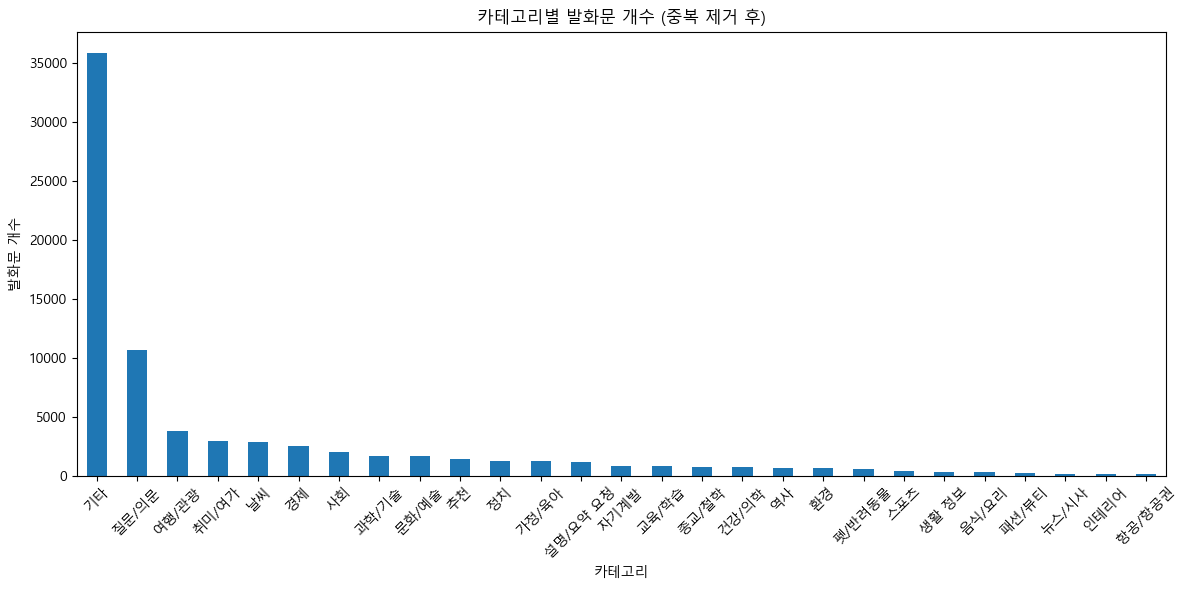

In [12]:
# 시각화: 카테고리별 발화문 개수
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('카테고리별 발화문 개수 (중복 제거 후)')
plt.xlabel('카테고리')
plt.ylabel('발화문 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# 중복 문장 필터링 (2번 이상 등장하는 문장만)
duplicates = utterance_counts[utterance_counts > 1]

In [14]:
# DataFrame으로 변환
duplicates_df = duplicates.reset_index()
duplicates_df.columns = ['Sentence', 'Count']

In [15]:
# 중복 문장과 개수 출력
print("\n중복된 문장과 그 개수:")
for index, row in duplicates_df.iterrows():
    print(f"{row['Sentence']} | {row['Count']}")


중복된 문장과 그 개수:
오늘 점심 뭐 먹지? | 2354
각 메뉴의 특징, 가격대 등을 표로 깔끔하게 정리해 줘. | 2175
국내 벚꽃 축제 알려줘 | 1983
국내 벚꽃축제 알려줘 | 1148
국내 벚꽃 축제 알려 줘 | 924
국내벚꽃축제알려줘 | 613
오늘 점심 메뉴 추천해줘 | 510
오늘 점심메뉴 추천해줘 | 458
근처 디저트 맛집 추천해줘 | 323
추천할 메뉴 뭐야? | 308
Liner Pro의 장점을 정확도 관점에서 설명해줘 | 303
점심메뉴 추천해줘 | 223
오늘 점심 메뉴 추천 | 214
안녕 | 202
점심메뉴추천 | 175
국내벚꽃축제 알려줘 | 165
빛의 속도가 항상 일정한 이유가 뭐야? | 158
지구 온난화의 원인과 그 영향은 뭐야? | 145
오늘 점심 추천해줘 | 144
면역 체계가 어떻게 우리 몸을 지키는지 설명해줘 | 144
공급과 수요 법칙이 시장 가격을 어떻게 결정해? | 143
인간의 언어 습득 과정에 대한 최신 이론과 연구 동향을 상세히 설명해줘 | 143
오늘 점심메뉴 추천 | 141
점심메뉴 추천 | 141
공리주의 원리와 현대 사회에서의 적용은 어떻게 돼? | 140
관광 산업이 지역 경제에 미치는 영향은 뭐야? | 136
점심 메뉴 추천해줘 | 136
유전 질환은 어떻게 생기고, 예방이나 치료가 가능해? | 136
1929년 대공황이 현대 경제 이론과 정책 형성에 어떤 영향을 미쳤는지 심도 있게 분석해줘 | 133
사이버 보안의 최신 위협과 대응 전략은 뭐야? | 132
자연 재해에 대비한 도시 계획 사례는 뭐가 있어? | 129
양자 컴퓨팅은 어떻게 작동하고, 어떤 분야에 적용될 수 있어? | 127
세계 경제에서 중국의 역할은 어떻게 바뀌고 있어? | 127
인플레이션과 디플레이션의 차이점과 경제에 미치는 영향은 뭐야? | 126
오늘점심메뉴추천해줘 | 122
재정 정책과 통화 정책의 차이는 뭐야? | 121
블랙홀은 어떻게 형성되고 어떤 특성이 있어? | 119
DNA의 구조와 기능은 뭐야?

<Figure size 1200x600 with 0 Axes>

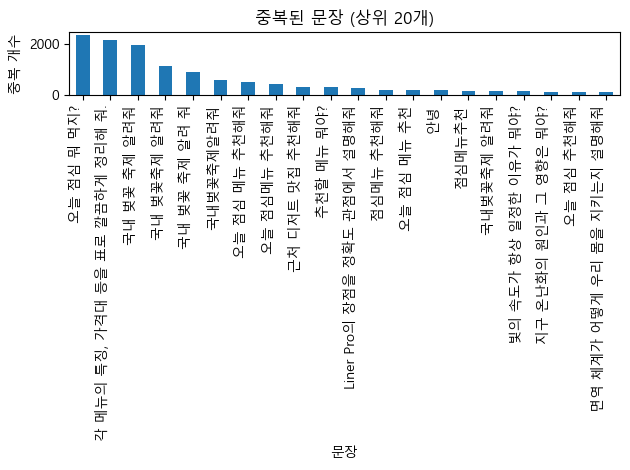

In [16]:
# 중복 문장 시각화
plt.figure(figsize=(12, 6))
duplicates_df.sort_values(by='Count', ascending=False).head(20).plot(
    x='Sentence', y='Count', kind='bar', legend=False)
plt.title('중복된 문장 (상위 20개)')
plt.xlabel('문장')
plt.ylabel('중복 개수')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

In [17]:
# 기타로 분류된 발화문 확인
etc_utterances = unique_data[unique_data['category'] == '기타']['content']
print("\n기타로 분류된 발화문 (상위 50개):")
print(etc_utterances.head(50))


기타로 분류된 발화문 (상위 50개):
1                                                멀티채널 전략
2                                  강화도에서 차타고 들어 갈 수 있는 섬
5      결과저장 대화상자가 이상하다. 파일명을 입력해야하는데, 폴더경로가 있다. 제대로 저...
7                                             몰입형 다감각 경험
9                                                현재 위치에서
10                                        그냥 메일 내용을 다듬어줘
13     CryptoJS 라이브러리를 사용한 강력한 AES 암호화\n노트 내용을 안전하게 암...
18                                                 선수금이란
21                                               이거 유료야?
24     https://www.card-gorilla.com/card/detail/474 링...
25                                        아니 500자 내외로 줄여
26                   위 글들을 바탕으로 실험결과를 도출하며 고찰(개선사항)을 써야해
27                 "Em là tất cá dôi vái anh.".\n한국어로 번역
31                          건설산업과 건설시스템의 차이점과 공통점은 무엇인가요
33     https://www.card-gorilla.com/card/detail/474 링...
36                                             대인공포증 극복법
37                                                  통화요약
38     T

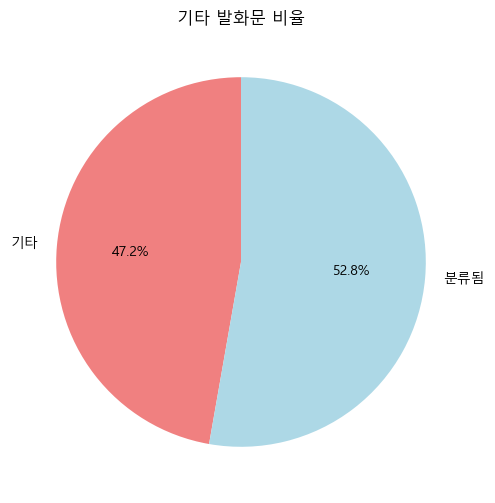


기타로 분류된 발화문 수: 35824 (47.24%)


In [18]:
# 기타 발화문 시각화
etc_count = len(etc_utterances)
total_count = len(unique_data)
etc_ratio = (etc_count / total_count) * 100

plt.figure(figsize=(6, 6))
plt.pie(
    [etc_count, total_count - etc_count],
    labels=['기타', '분류됨'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightblue']
)
plt.title('기타 발화문 비율')
plt.show()

print(f"\n기타로 분류된 발화문 수: {etc_count} ({etc_ratio:.2f}%)")
